In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import warnings
from dataScipy import DataScience as DS

In [373]:
INDEX = [i for i in range(0, 501)]
START = 100

### <span style="color:RED">1: Fitting a standard ARMA model</span>

### <span style="color:RED">1-a</span>

In [374]:
def generate_ARMA_process(c, phi_list, theta_list, errors, lenght_of_series):

    """
    This function generates an MA process with the given parameters.
    :param c: constant (float)
    :param sigma: standard deviation of the error term (float)
    :param theta: moving average coefficients (list)
    :param errors: error term (list)
    :param lenght: lenght of the MA process (int)
    :return: MA process (list)

    :Example:
    >>> generate_MA_process(0, 1, 0.5)
    """

    ARMA_process = []

    for i in range(lenght_of_series + 1):
        if i == 0:
            ARMA_process.append(c)
        else:
            ARMA_process.append(c
                                + sum([phi_list[j] * ARMA_process[i - j - 1] for j in range(len(phi_list))])
                                + sum([theta_list[j] * errors[i - j - 1] for j in range(len(theta_list))])
                                + errors[i])

    return ARMA_process

In [375]:
np.random.seed(123)
ARMA_11 = generate_ARMA_process(100, [0.5], [-0.8],  errors=np.random.normal(0, 15, 501), lenght_of_series=500)

### <span style="color:RED">1-b</span>

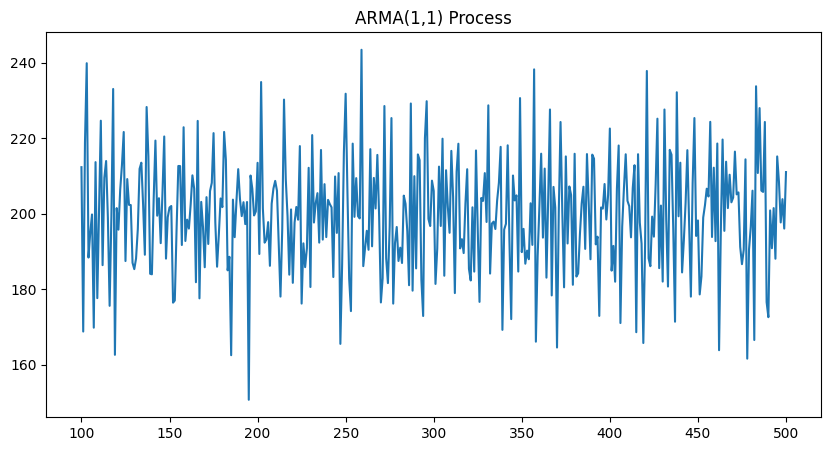

In [376]:
plt.figure(figsize=(10, 5))

plt.plot(INDEX[START:], ARMA_11[START:], label="ARMA(1,1) Process")
plt.title("ARMA(1,1) Process")
plt.show()

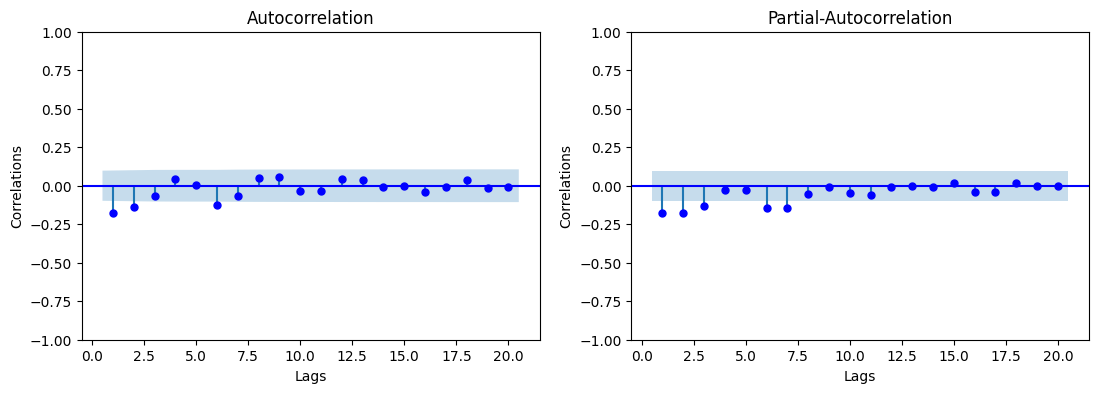

In [377]:
DS.plot_PACF_ACF_together(ARMA_11[START:], 20)

### <span style="color:RED">1-c</span>

In [378]:
AR1_MODEL = sm.tsa.statespace.SARIMAX(ARMA_11[START:], trend ='c', order=(1, 0, 0), seasonal_order=(0, 0, 0, 0)).fit(disp=False)
print(AR1_MODEL.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  401
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1656.646
Date:                Mon, 03 Apr 2023   AIC                           3319.291
Time:                        01:45:20   BIC                           3331.273
Sample:                             0   HQIC                          3324.036
                                - 401                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    234.5444     10.328     22.710      0.000     214.303     254.786
ar.L1         -0.1745      0.051     -3.388      0.001      -0.275      -0.074
sigma2       226.9259     15.713     14.442      0.0

In [379]:
AR1_MODEL_PREDICTIONS = list(AR1_MODEL.predict())

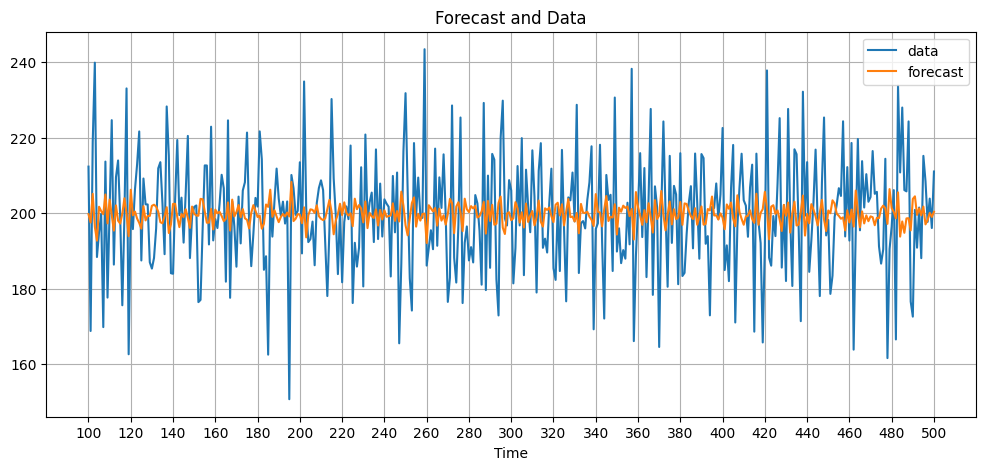

Error Summary
-------------
MAE: 11.8680
MAPE: 6.0170
MSE: 226.9367
RMSE: 15.0644

AIC: 3319.2915


In [380]:
DS.plot_forecasts(ARMA_11[START:], INDEX[START:], AR1_MODEL_PREDICTIONS, 20)

DS.print_error_summary(ARMA_11[START:], AR1_MODEL_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(AR1_MODEL.aic)) 

### <span style="color:RED">1-d</span>

In [381]:
MA1_MODEL = sm.tsa.statespace.SARIMAX(ARMA_11[START:], trend ='c', order=(0, 0, 1), seasonal_order=(0, 0, 0, 0)).fit(disp=False)
print(MA1_MODEL.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  401
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1653.146
Date:                Mon, 03 Apr 2023   AIC                           3312.293
Time:                        01:45:20   BIC                           3324.274
Sample:                             0   HQIC                          3317.037
                                - 401                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    199.7011      0.540    369.576      0.000     198.642     200.760
ma.L1         -0.2769      0.053     -5.215      0.000      -0.381      -0.173
sigma2       222.9634     15.518     14.368      0.0

In [382]:
MA1_MODEL_PREDICTIONS = list(MA1_MODEL.predict())

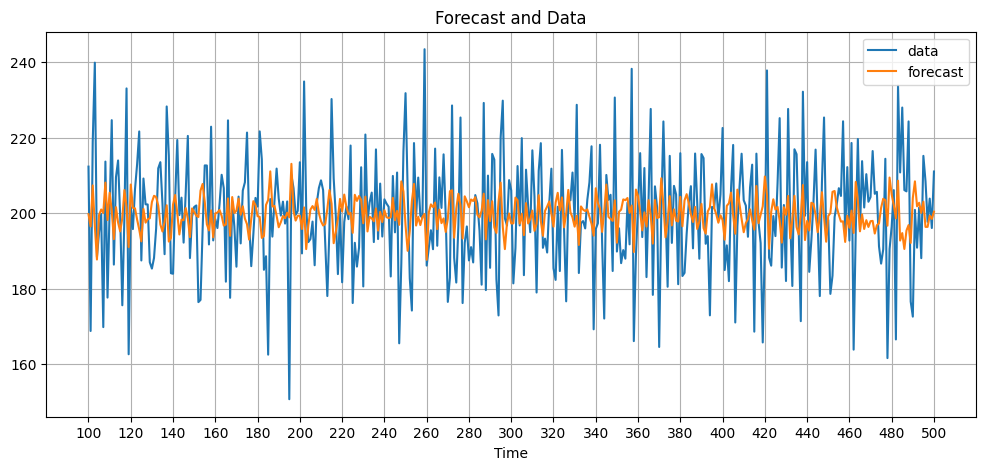

Error Summary
-------------
MAE: 11.8039
MAPE: 5.9817
MSE: 223.0101
RMSE: 14.9335

AIC: 3312.2926


In [383]:
DS.plot_forecasts(ARMA_11[START:], INDEX[START:], MA1_MODEL_PREDICTIONS, 20)

DS.print_error_summary(ARMA_11[START:], MA1_MODEL_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(MA1_MODEL.aic))

### <span style="color:RED">1-e</span>

In [384]:
ARMA11_MODEL = sm.tsa.statespace.SARIMAX(ARMA_11[START:], trend ='c', order=(1, 0, 1), seasonal_order=(0, 0, 0, 0)).fit(disp=False)
print(ARMA11_MODEL.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  401
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1660.512
Date:                Mon, 03 Apr 2023   AIC                           3329.024
Time:                        01:45:21   BIC                           3345.000
Sample:                             0   HQIC                          3335.350
                                - 401                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    308.8197     64.289      4.804      0.000     182.815     434.824
ar.L1         -0.5462      0.322     -1.698      0.089      -1.176       0.084
ma.L1          0.4408      0.342      1.290      0.1

In [385]:
ARMA11_MODEL_PREDICTIONS = list(ARMA11_MODEL.predict())

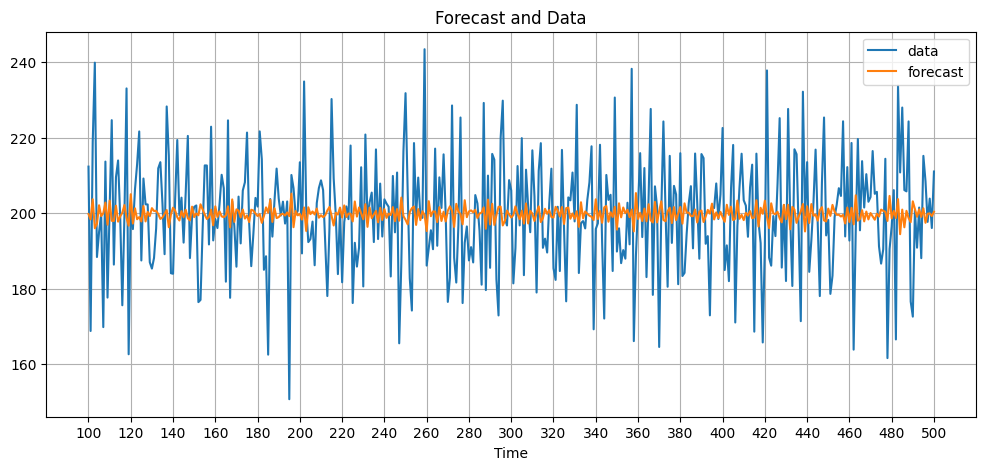

Error Summary
-------------
MAE: 11.9471
MAPE: 6.0595
MSE: 231.3630
RMSE: 15.2106

AIC: 3329.0237


In [386]:
DS.plot_forecasts(ARMA_11[START:], INDEX[START:], ARMA11_MODEL_PREDICTIONS, 20)

DS.print_error_summary(ARMA_11[START:], ARMA11_MODEL_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(ARMA11_MODEL.aic))

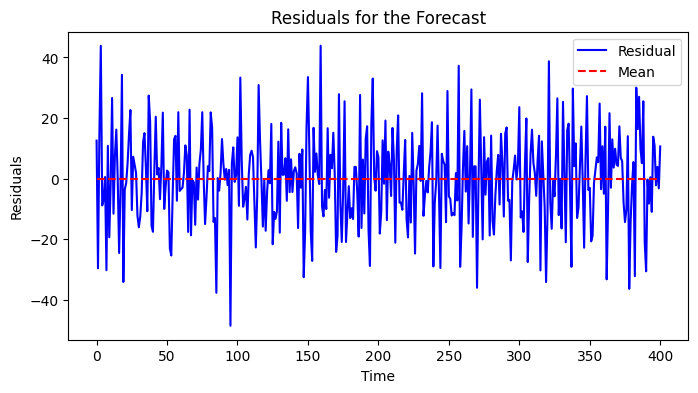

Mean of Residual:   -0.0250
S.D. of Residual:   15.2296
Half Width :        1.4951   (degree of freedom = 400, Confidence Level = 0.95)
p-value :           0.9738


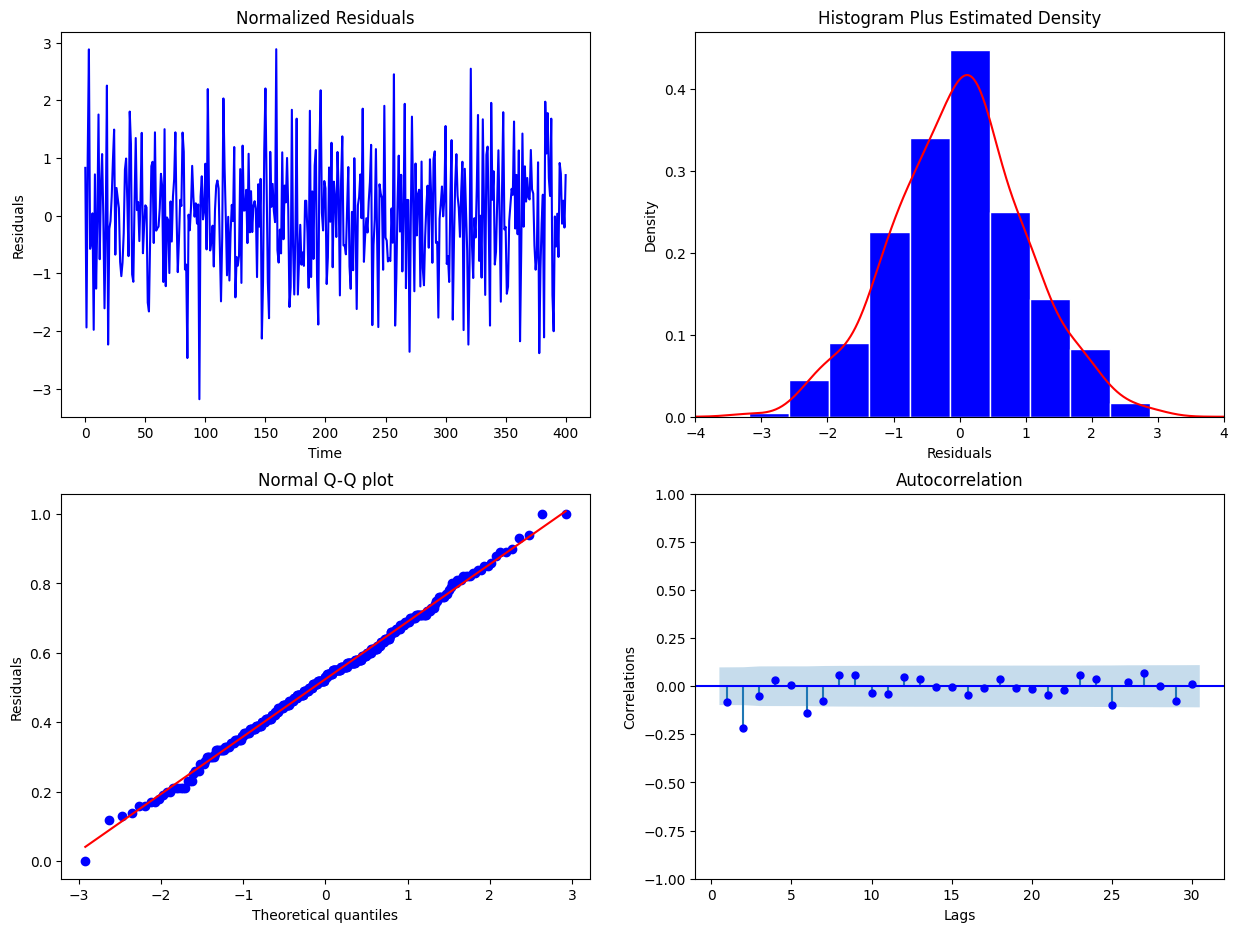

In [387]:
ARMA11_MODEL_RESIDS = ARMA11_MODEL.resid

DS.plot_resids(ARMA11_MODEL_RESIDS)
DS.print_resids_summary(ARMA11_MODEL_RESIDS)

DS.show_all_normalized_resids_plots(ARMA11_MODEL_RESIDS)

### <span style="color:RED">2: Fitting a non-standard ARMA model</span>

### <span style="color:RED">2-a</span>

In [388]:
np.random.seed(123)
MA_PROCESS = DS.generate_MA_process(100, [0, -0.8], np.random.normal(0, 15, 501), 500)

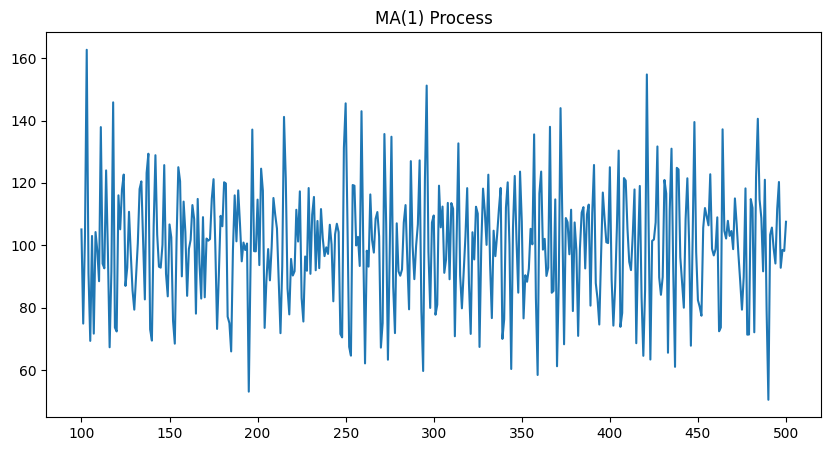

In [389]:
plt.figure(figsize=(10, 5))

plt.plot(INDEX[START:], MA_PROCESS[START:], label="MA(1) Process")
plt.title("MA(1) Process")
plt.show()

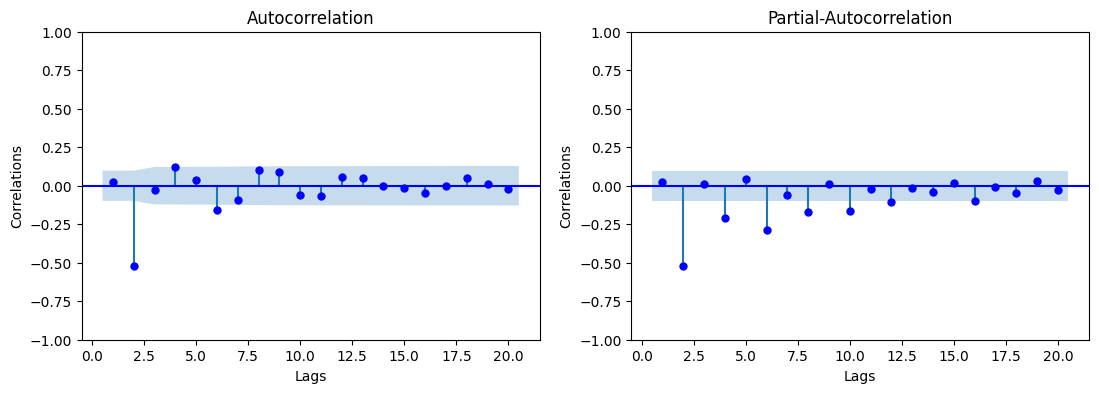

In [390]:
DS.plot_PACF_ACF_together(MA_PROCESS[START:], 20)

### <span style="color:RED">2-b</span>

In [391]:
MA2_MODEL = sm.tsa.statespace.SARIMAX(MA_PROCESS[START:], trend ='c', order=(0, 0, [0, 1]), seasonal_order=(0, 0, 0, 0)).fit(disp=False)

print(MA2_MODEL.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  401
Model:             SARIMAX(0, 0, [2])   Log Likelihood               -1641.946
Date:                Mon, 03 Apr 2023   AIC                           3289.891
Time:                        01:45:22   BIC                           3301.873
Sample:                             0   HQIC                          3294.636
                                - 401                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     99.8282      0.131    761.013      0.000      99.571     100.085
ma.L2         -0.8259      0.029    -28.083      0.000      -0.884      -0.768
sigma2       209.6965     14.348     14.615      0.0

In [392]:
MA2_MODEL_PREDICTIONS = list(MA2_MODEL.predict())

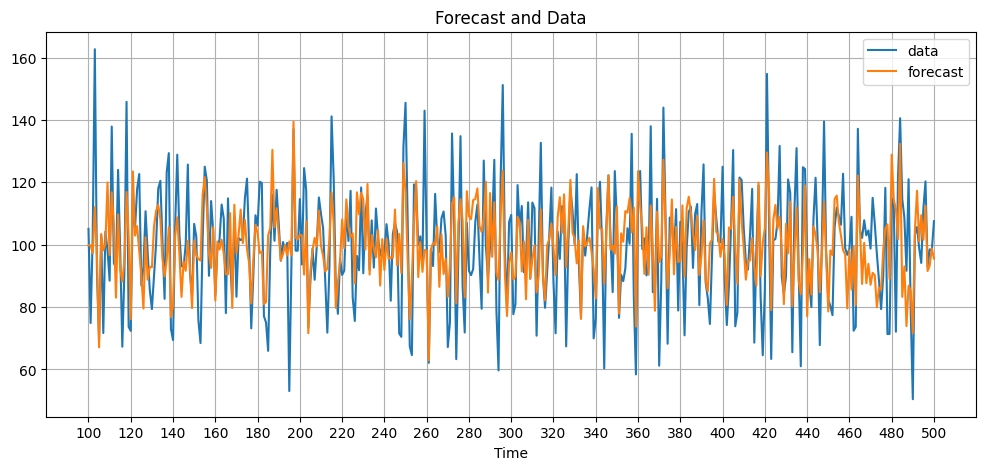

Error Summary
-------------
MAE: 11.4604
MAPE: 12.1632
MSE: 212.0886
RMSE: 14.5633

AIC: 3289.8913


In [393]:
DS.plot_forecasts(MA_PROCESS[START:], INDEX[START:], MA2_MODEL_PREDICTIONS, 20)

DS.print_error_summary(MA_PROCESS[START:], MA2_MODEL_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(MA2_MODEL.aic))

### <span style="color:RED">3: Australian Beer Production</span>

### <span style="color:RED">3-a</span>

In [394]:
AUSBEER = pd.read_csv("ausbeer.csv", header=None)

MONTHS = AUSBEER[0]
BEERS = AUSBEER[1]

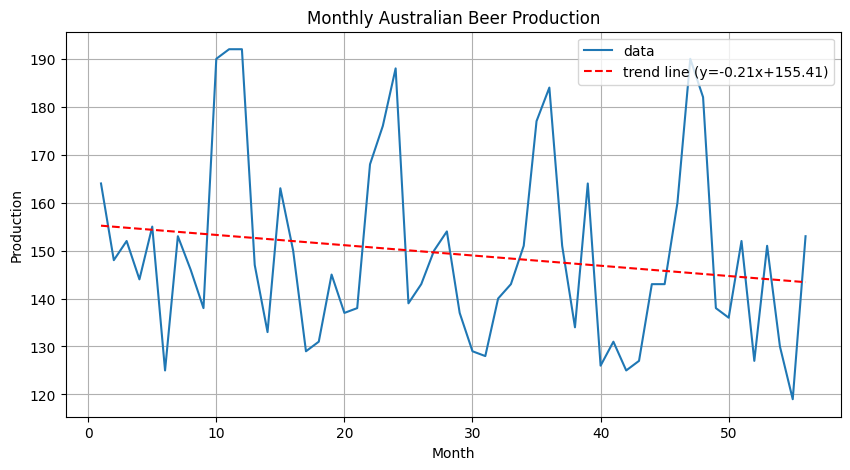

In [395]:
plt.figure(figsize=(10, 5))

z = np.polyfit(MONTHS, BEERS, 1)
p = np.poly1d(z)

plt.plot(MONTHS, BEERS, label='data')
plt.plot(MONTHS, p(MONTHS), 'r--', label='trend line'+f' (y={round(z[0], 2)}x+{round(z[1], 2)})')
plt.title("Monthly Australian Beer Production")
plt.xlabel("Month")
plt.ylabel("Production")
plt.legend(loc="upper right")
plt.grid()
plt.show()

### <span style="color:RED">3-b</span>

In [396]:
SEASONAL_MODEL = sm.tsa.statespace.SARIMAX(BEERS, trend ='c', order=(0, 0, 0), seasonal_order=(0, 1, 0, 12)).fit(disp=False)
print(SEASONAL_MODEL.summary())

                                SARIMAX Results                                 
Dep. Variable:                        1   No. Observations:                   56
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -168.421
Date:                  Mon, 03 Apr 2023   AIC                            340.842
Time:                          01:45:23   BIC                            344.411
Sample:                               0   HQIC                           342.166
                                   - 56                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.6818      1.725     -1.554      0.120      -6.063       0.700
sigma2       123.6715     31.796      3.889      0.000      61.352     185.991
Ljung-Box (L1) (Q):                 

In [397]:
SEASONAL_MODEL_PREDICTIONS = list(SEASONAL_MODEL.predict())
SEASONAL_MODEL_PREDICTIONS[0:12] = [None] * 12

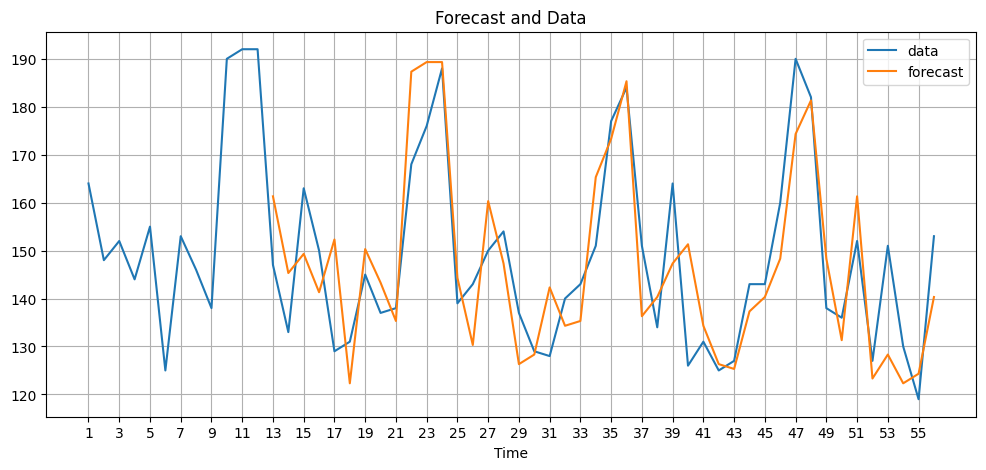

Error Summary
-------------
MAE: 9.1983
MAPE: 6.3191
MSE: 123.6715
RMSE: 11.1208

AIC: 340.8423


In [398]:
DS.plot_forecasts(BEERS, MONTHS, SEASONAL_MODEL_PREDICTIONS, time_step=2)

DS.print_error_summary(BEERS, SEASONAL_MODEL_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(SEASONAL_MODEL.aic))

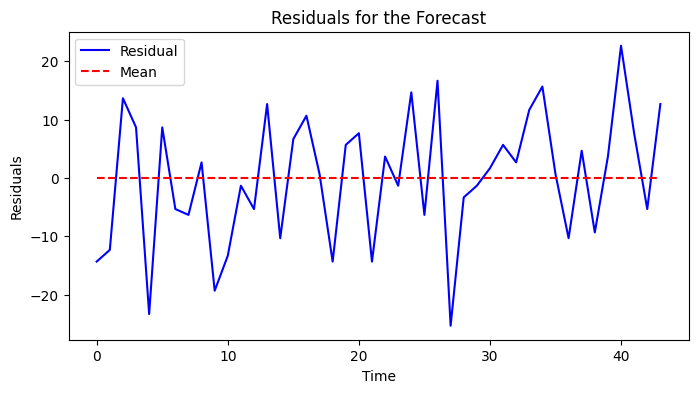

Mean of Residual:   0.0000
S.D. of Residual:   11.2493
Half Width :        3.4201   (degree of freedom = 43, Confidence Level = 0.95)
p-value :           1.0000


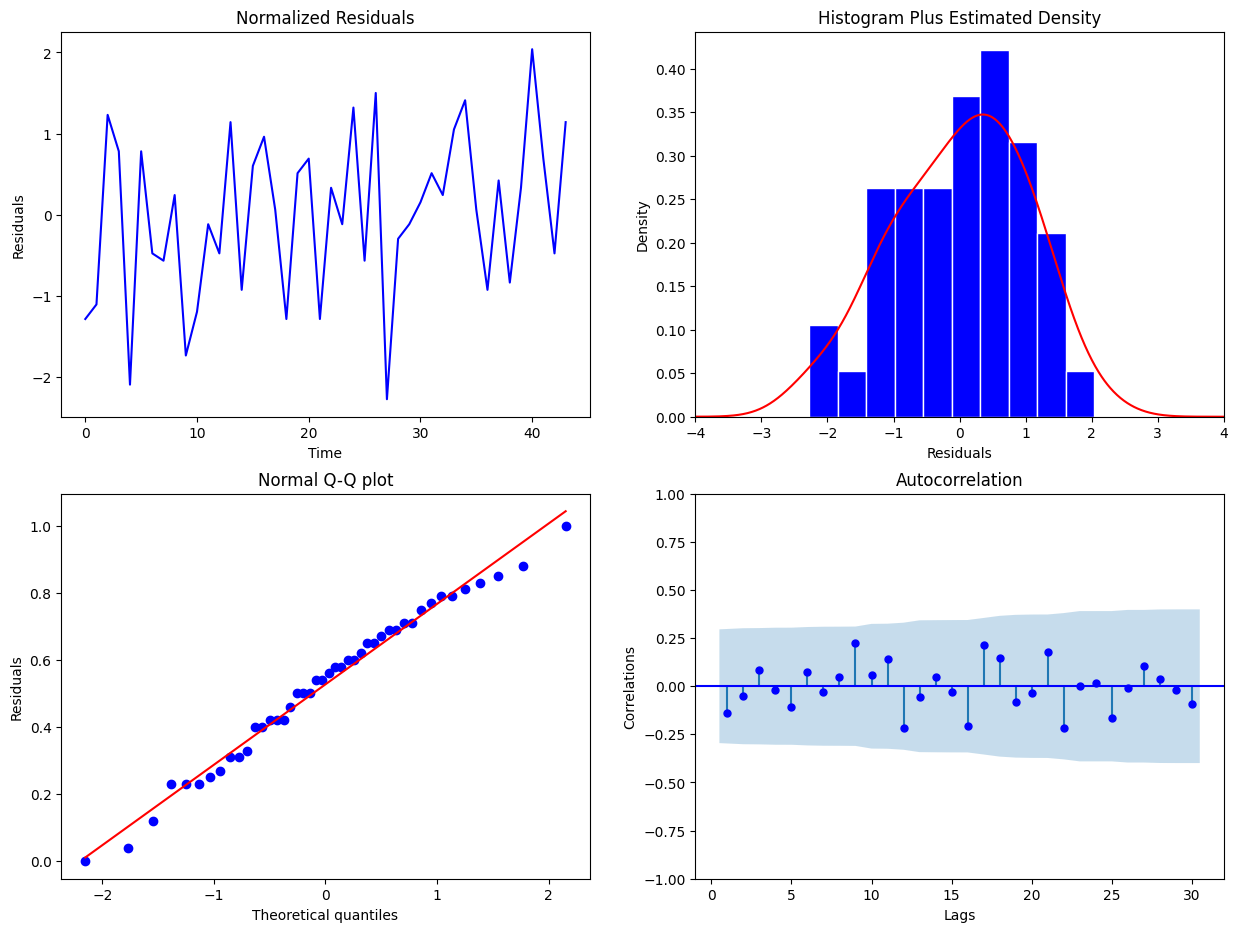

In [399]:
SEASONAL_MODEL_RESIDS = DS.get_all_residuals(BEERS, SEASONAL_MODEL_PREDICTIONS)

DS.plot_resids(SEASONAL_MODEL_RESIDS)
DS.print_resids_summary(SEASONAL_MODEL_RESIDS)

DS.show_all_normalized_resids_plots(SEASONAL_MODEL_RESIDS)

### <span style="color:RED">3-c</span>

In [400]:
SEASONAL_AR_MODEL = sm.tsa.statespace.SARIMAX(BEERS, trend ='c', order=(1, 0, 0), seasonal_order=(0, 1, 0, 12)).fit(disp=False)
print(SEASONAL_AR_MODEL.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  1   No. Observations:                   56
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -167.956
Date:                            Mon, 03 Apr 2023   AIC                            341.912
Time:                                    01:45:24   BIC                            347.265
Sample:                                         0   HQIC                           343.897
                                             - 56                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.0732      1.689     -1.819      0.069      -6.384       0.238
ar.L1         -0.1479      0.162   

In [401]:
SEASONAL_AR_MODEL_PREDICTIONS = list(SEASONAL_AR_MODEL.predict())
SEASONAL_AR_MODEL_PREDICTIONS[0:12] = [None] * 12

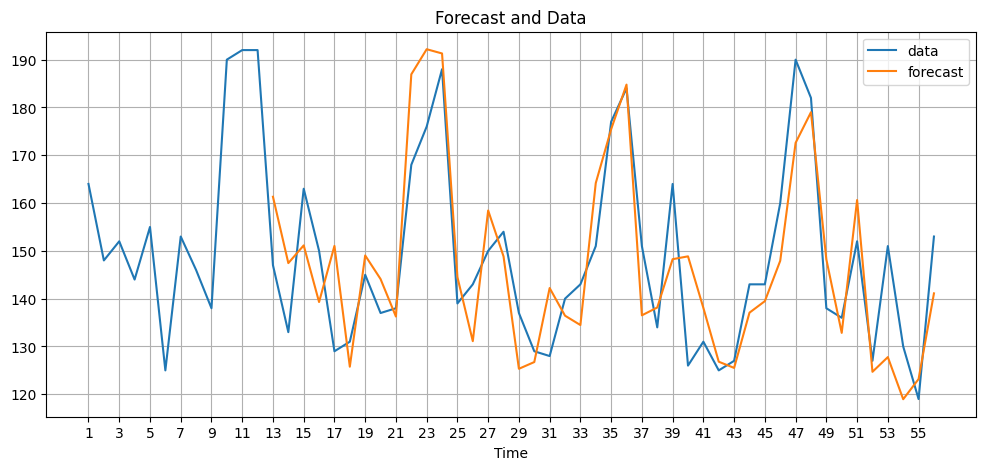

Error Summary
-------------
MAE: 9.1084
MAPE: 6.2378
MSE: 121.1259
RMSE: 11.0057

AIC: 341.9122


In [402]:
DS.plot_forecasts(BEERS, MONTHS, SEASONAL_AR_MODEL_PREDICTIONS, time_step=2)

DS.print_error_summary(BEERS, SEASONAL_AR_MODEL_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(SEASONAL_AR_MODEL.aic))

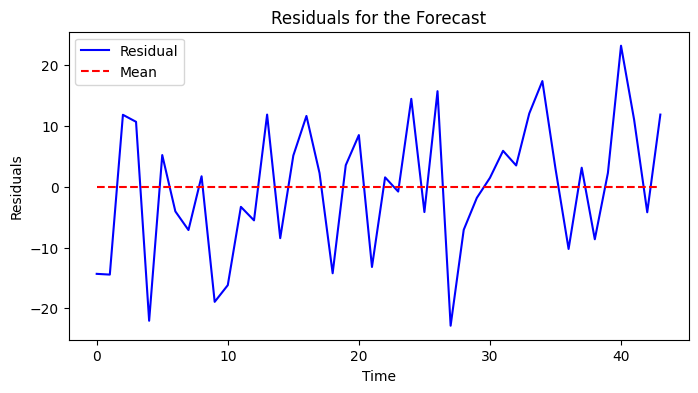

Mean of Residual:   -0.0479
S.D. of Residual:   11.1329
Half Width :        3.3847   (degree of freedom = 43, Confidence Level = 0.95)
p-value :           0.9774


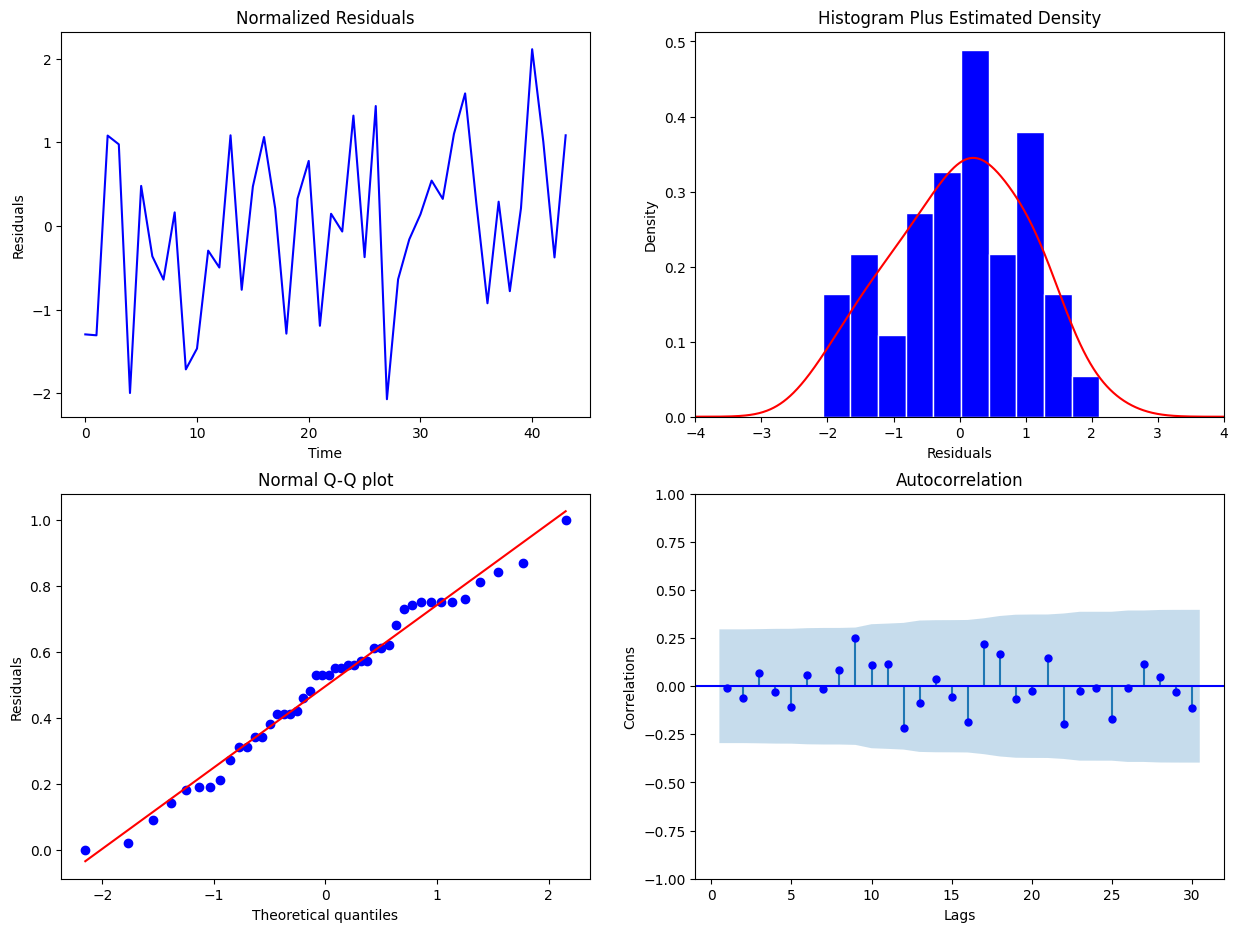

In [403]:
SEASONAL_AR_MODEL_RESIDS = DS.get_all_residuals(BEERS, SEASONAL_AR_MODEL_PREDICTIONS)

DS.plot_resids(SEASONAL_AR_MODEL_RESIDS)
DS.print_resids_summary(SEASONAL_AR_MODEL_RESIDS)

DS.show_all_normalized_resids_plots(SEASONAL_AR_MODEL_RESIDS)

### <span style="color:RED">3-d</span>

In [404]:
# the default prediction is one step ahead but we can also have multiple-step ahead forecasts using the 'dynamic prediction' capability
# Let's assume that we have data available until month for 40 and let's make multi-step predictions using only data upto month 40
# Note that multi-step ahead forecasts replace observations with forecasts (once we have a forecast for month 41, we can use that as
#an input to month 41 and so on)

SEASONAL_AR_PREDICTIONS_DYNAMIC = list(SEASONAL_AR_MODEL.get_prediction(dynamic=40).predicted_mean)
SEASONAL_AR_PREDICTIONS_DYNAMIC[0:12] = [None] * 12

### <span style="color:RED">3-e</span>

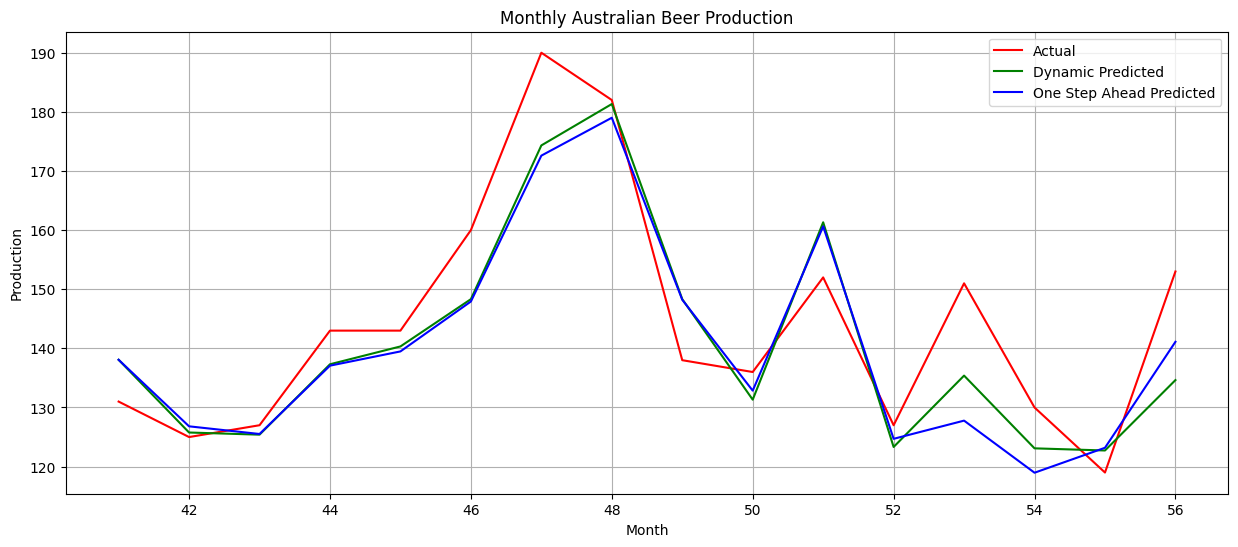

In [405]:
plt.figure(figsize=(15, 6))

plt.plot(MONTHS[40:56], BEERS[40:56], label="Actual", color="red")
plt.plot(MONTHS[40:56], SEASONAL_AR_PREDICTIONS_DYNAMIC[40:56], label="Dynamic Predicted", color="green")
plt.plot(MONTHS[40:56], SEASONAL_AR_MODEL_PREDICTIONS[40:56], label="One Step Ahead Predicted", color="blue")
plt.title("Monthly Australian Beer Production")
plt.xlabel("Month")
plt.ylabel("Production")
plt.legend(loc="upper right")
plt.grid()
plt.show()

### <span style="color:RED">3-f</span>

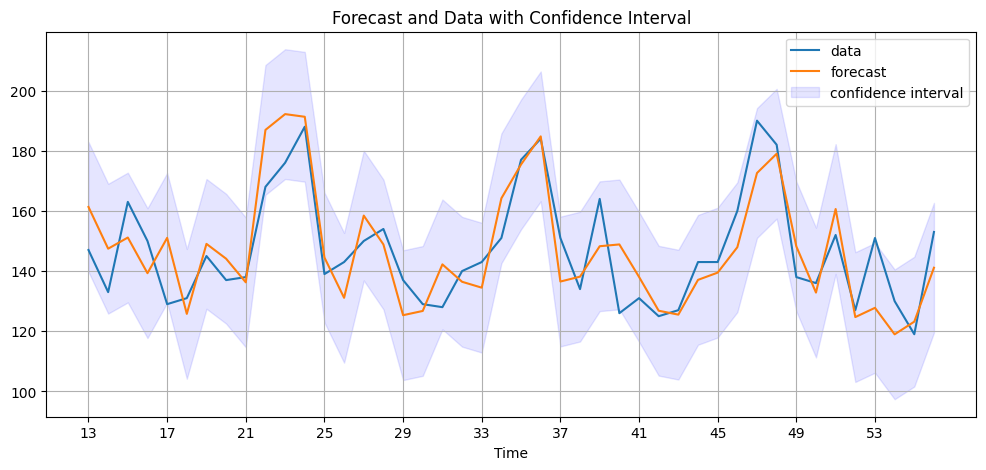

In [406]:
DS.plot_forecasts_predictIntervals(BEERS[12:], MONTHS[12:], SEASONAL_AR_MODEL_PREDICTIONS[12:],
                                    DS.RMSE(BEERS, SEASONAL_AR_MODEL_PREDICTIONS), percent=0.95, time_step=4)

### <span style="color:RED">4: Dishwasher Sales</span>

### <span style="color:RED">4-a</span>

In [407]:
DISHWASHER = pd.read_csv("dishwasher.csv", header=None)

MONTHS_DISHWASHER = list(DISHWASHER[0])
SALES_DISHWASHER = list(DISHWASHER[1])

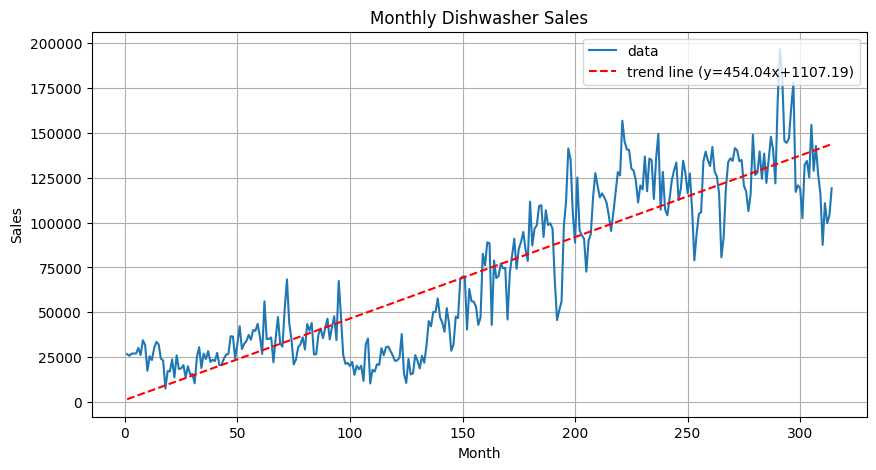

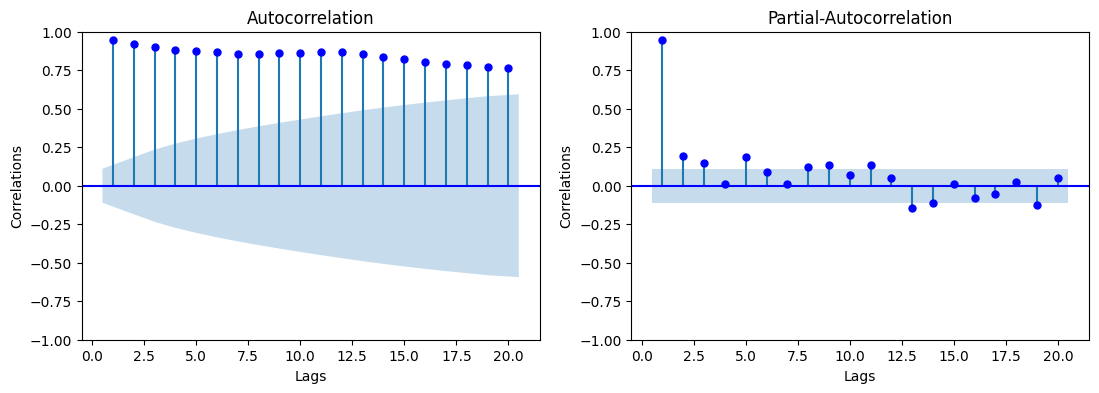

In [408]:
plt.figure(figsize=(10, 5))

z = np.polyfit(MONTHS_DISHWASHER, SALES_DISHWASHER, 1)
p = np.poly1d(z)

plt.plot(MONTHS_DISHWASHER, SALES_DISHWASHER, label='data')
plt.plot(MONTHS_DISHWASHER, p(MONTHS_DISHWASHER), 'r--', label='trend line'+f' (y={round(z[0], 2)}x+{round(z[1], 2)})')
plt.title("Monthly Dishwasher Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(loc="upper right")
plt.grid()
plt.show()

DS.plot_PACF_ACF_together(SALES_DISHWASHER, no_lags=20)

### <span style="color:RED">4-b</span>

In [409]:
DEASEASON_DIFF_SALES_DISHWASHER = DS.take_diff_of_series(DS.deseasonalize_series(SALES_DISHWASHER, 12)[12:])

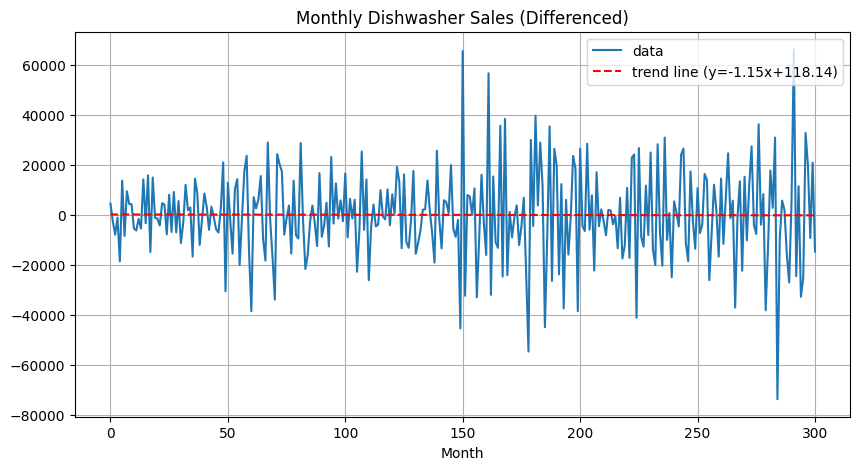

In [410]:
plt.figure(figsize=(10, 5))

z = np.polyfit(range(len(MONTHS_DISHWASHER) - 13), DEASEASON_DIFF_SALES_DISHWASHER, 1)
p = np.poly1d(z)

plt.plot(range(len(MONTHS_DISHWASHER) - 13), DEASEASON_DIFF_SALES_DISHWASHER, label='data')
plt.plot(range(len(MONTHS_DISHWASHER) - 13), p(range(len(MONTHS_DISHWASHER) - 13)), 'r--', label='trend line'+f' (y={round(z[0], 2)}x+{round(z[1], 2)})')
plt.title("Monthly Dishwasher Sales (Differenced)")
plt.xlabel("Month")
plt.legend(loc="upper right")
plt.grid()
plt.show()

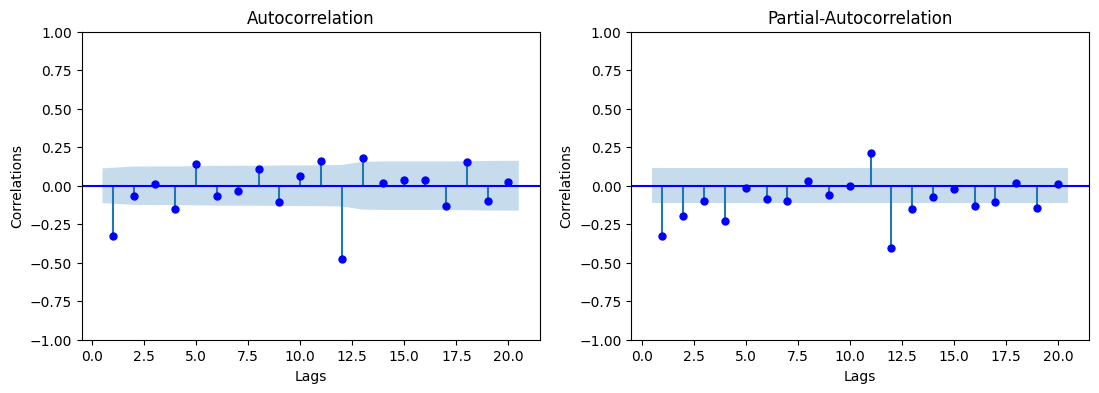

In [411]:
DS.plot_PACF_ACF_together(DEASEASON_DIFF_SALES_DISHWASHER, no_lags=20)

### <span style="color:RED">4-c</span>

In [412]:
SARIMA_MODEL_TRAIN = sm.tsa.statespace.SARIMAX(SALES_DISHWASHER[0:200], trend ='c', order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(disp=False)
print(SARIMA_MODEL_TRAIN.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  200
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2033.874
Date:                            Mon, 03 Apr 2023   AIC                           4075.747
Time:                                    01:45:27   BIC                           4088.672
Sample:                                         0   HQIC                          4080.984
                                            - 200                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -13.3074    263.387     -0.051      0.960    -529.537     502.922
ma.L1         -0.3829      0.083   

In [413]:
SARIMA_MODEL_TRAIN_PREDICTIONS = list(SARIMA_MODEL_TRAIN.predict())
SARIMA_MODEL_TRAIN_PREDICTIONS[:1] = [None] * 1
len(SARIMA_MODEL_TRAIN_PREDICTIONS)

200

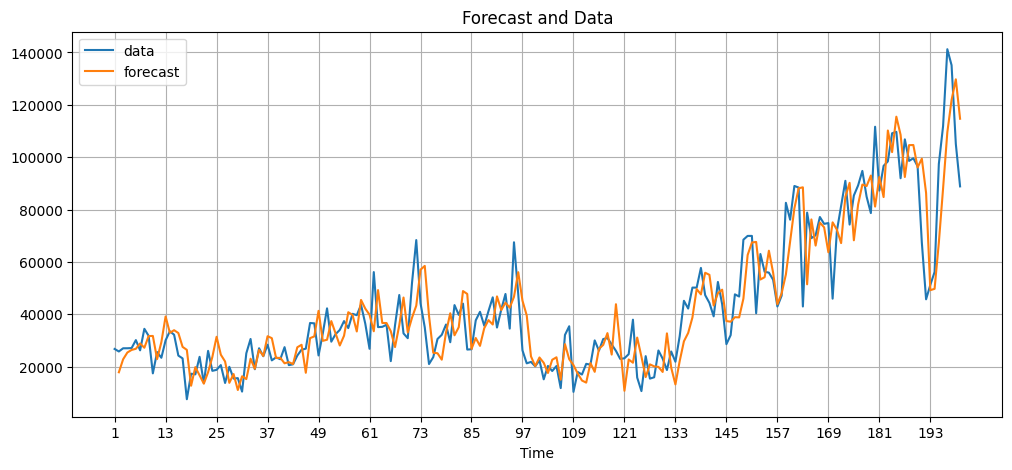

Error Summary
-------------
MAE: 8632.2431
MAPE: 24.5136
MSE: 139378370.9673
RMSE: 11805.8617

AIC: 4075.7474


In [414]:
DS.plot_forecasts(SALES_DISHWASHER[:200], MONTHS_DISHWASHER[:200], SARIMA_MODEL_TRAIN_PREDICTIONS, time_step=12)

DS.print_error_summary(SALES_DISHWASHER[:200], SARIMA_MODEL_TRAIN_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(SARIMA_MODEL_TRAIN.aic))

### <span style="color:RED">4-d</span>

In [415]:
# use the parameters estimated from the training data,
# we used the '.params' attribute to get the parameters from the training model and then used them to initialize the test model
SARIMA_MODEL_TEST = sm.tsa.statespace.SARIMAX(SALES_DISHWASHER[200:], trend ='c', order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).filter(SARIMA_MODEL_TRAIN.params)
print(SARIMA_MODEL_TEST.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1123.352
Date:                            Mon, 03 Apr 2023   AIC                           2254.705
Time:                                    01:45:27   BIC                           2265.165
Sample:                                         0   HQIC                          2258.940
                                            - 114                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -13.3074    341.540     -0.039      0.969    -682.713     656.098
ma.L1         -0.3829      0.088   

In [416]:
SARIMA_MODEL_TEST_PREDICTIONS = list(SARIMA_MODEL_TEST.predict())
SARIMA_MODEL_TEST_PREDICTIONS[:1] = [None] * 1

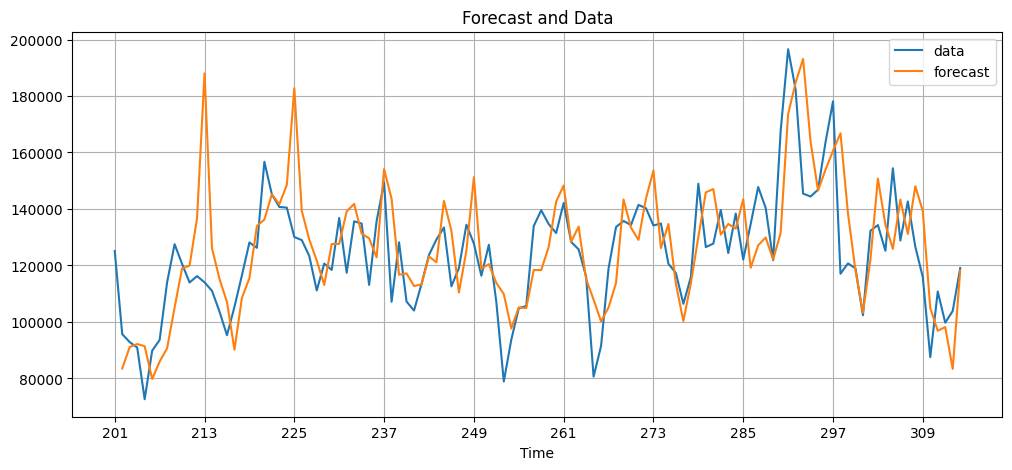

Error Summary
-------------
MAE: 12953.4694
MAPE: 10.6991
MSE: 304505938.3607
RMSE: 17450.0985

AIC: 2254.7049


In [417]:
DS.plot_forecasts(SALES_DISHWASHER[200:], MONTHS_DISHWASHER[200:], SARIMA_MODEL_TEST_PREDICTIONS, time_step=12)

DS.print_error_summary(SALES_DISHWASHER[200:], SARIMA_MODEL_TEST_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(SARIMA_MODEL_TEST.aic))

### <span style="color:RED">EXTRA</span>

In [432]:
# Let's look at some other forecasts to see whether we can do any better


# we can automate the search of a large number of models. Let's take all possible combinations of ARIMA parameters p,d,q and
# seasonal parameters P,D,Q that are in the range from 0 to 2.
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

MIN_AIC = np.inf
MIN_RMSE = np.inf
BEST_AIC_MODEL = None
BEST_RMSE_MODEL = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(SALES_DISHWASHER[0:200], trend = 'c',
                                            order=param,
                                            seasonal_order=param_seasonal)

            results = mod.fit(disp=False)

            initial_RMSE = DS.RMSE(SALES_DISHWASHER[:200], list(results.predict()))
            initial_MAPE = DS.MAPE(SALES_DISHWASHER[:200], list(results.predict()))
            initial_AIC = results.aic
            initial_model = str('SARIMA{}{}12 - AIC:{} - RMSE:{} - MAPE:{}'.format(param, param_seasonal, initial_AIC, initial_RMSE, initial_MAPE))
            print(initial_model)

            if initial_AIC < MIN_AIC:
                MIN_AIC = initial_AIC
                BEST_AIC_MODEL = initial_model

            if initial_RMSE < MIN_RMSE:
                MIN_RMSE = initial_RMSE
                BEST_RMSE_MODEL = initial_model
                   
        except:
            continue

print("\nBest AIC model: {}".format(BEST_AIC_MODEL))
print("Best RMSE model: {}".format(BEST_RMSE_MODEL))

SARIMA(0, 0, 0)(0, 0, 0, 12)12 - AIC:4650.771303511994 - RMSE:26849.157611603252 - MAPE:63.336940598262146
SARIMA(0, 0, 0)(0, 0, 1, 12)12 - AIC:4581.420867560559 - RMSE:21268.373213330622 - MAPE:50.52893151896488
SARIMA(0, 0, 0)(0, 1, 0, 12)12 - AIC:4203.3012336739175 - RMSE:17558.784318662372 - MAPE:43.17918471741406
SARIMA(0, 0, 0)(0, 1, 1, 12)12 - AIC:4189.795894900963 - RMSE:16894.509780461518 - MAPE:41.11203551378803
SARIMA(0, 0, 0)(1, 0, 0, 12)12 - AIC:4626.270931690202 - RMSE:25008.048209242505 - MAPE:76.05048691335833
SARIMA(0, 0, 0)(1, 0, 1, 12)12 - AIC:4578.675023621311 - RMSE:20952.316351453974 - MAPE:56.529697269303234
SARIMA(0, 0, 0)(1, 1, 0, 12)12 - AIC:4190.53310426515 - RMSE:17002.51364677655 - MAPE:40.268041994667584
SARIMA(0, 0, 0)(1, 1, 1, 12)12 - AIC:4191.790386278676 - RMSE:16900.96260445678 - MAPE:41.02226233926071
SARIMA(0, 0, 1)(0, 0, 0, 12)12 - AIC:4542.844520960661 - RMSE:18340.8213735695 - MAPE:41.45081681003781
SARIMA(0, 0, 1)(0, 0, 1, 12)12 - AIC:4526.81239

In [437]:
BEST_SARIMA_MODEL_TRAIN = sm.tsa.statespace.SARIMAX(SALES_DISHWASHER[0:200], trend = 'c', order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit(disp=False)
print(BEST_SARIMA_MODEL_TRAIN.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  200
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2015.007
Date:                            Mon, 03 Apr 2023   AIC                           4042.014
Time:                                    02:03:46   BIC                           4061.400
Sample:                                         0   HQIC                          4049.869
                                            - 200                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.3466     41.517      0.321      0.748     -68.025      94.718
ar.L1          0.4950      0.076   

In [438]:
BEST_SARIMA_MODEL_PREDICTIONS = list(BEST_SARIMA_MODEL_TRAIN.predict())
BEST_SARIMA_MODEL_PREDICTIONS[:1] = [None] * 1

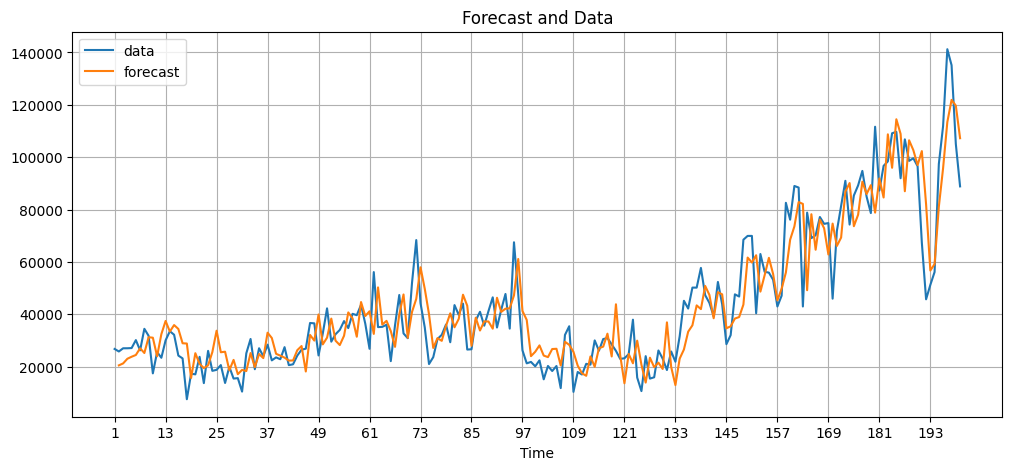

Error Summary
-------------
MAE: 8474.9073
MAPE: 25.1671
MSE: 126978969.4947
RMSE: 11268.4946

AIC: 4042.0135


In [439]:
DS.plot_forecasts(SALES_DISHWASHER[:200], MONTHS_DISHWASHER[:200], BEST_SARIMA_MODEL_PREDICTIONS, time_step=12)

DS.print_error_summary(SALES_DISHWASHER[:200], BEST_SARIMA_MODEL_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(BEST_SARIMA_MODEL_TRAIN.aic))

In [440]:
BEST_SARIMA_MODEL_TEST = sm.tsa.statespace.SARIMAX(SALES_DISHWASHER[200:], trend ='c', order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).filter(BEST_SARIMA_MODEL_TRAIN.params)
print(BEST_SARIMA_MODEL_TEST.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1158.147
Date:                            Mon, 03 Apr 2023   AIC                           2328.295
Time:                                    02:03:46   BIC                           2343.985
Sample:                                         0   HQIC                          2334.647
                                            - 114                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.3466     58.559      0.228      0.820    -101.427     128.120
ar.L1          0.4950      0.073   

In [441]:
BEST_SARIMA_MODEL_TEST_PREDICTIONS = list(BEST_SARIMA_MODEL_TEST.predict())
BEST_SARIMA_MODEL_TEST_PREDICTIONS[:1] = [None] * 1

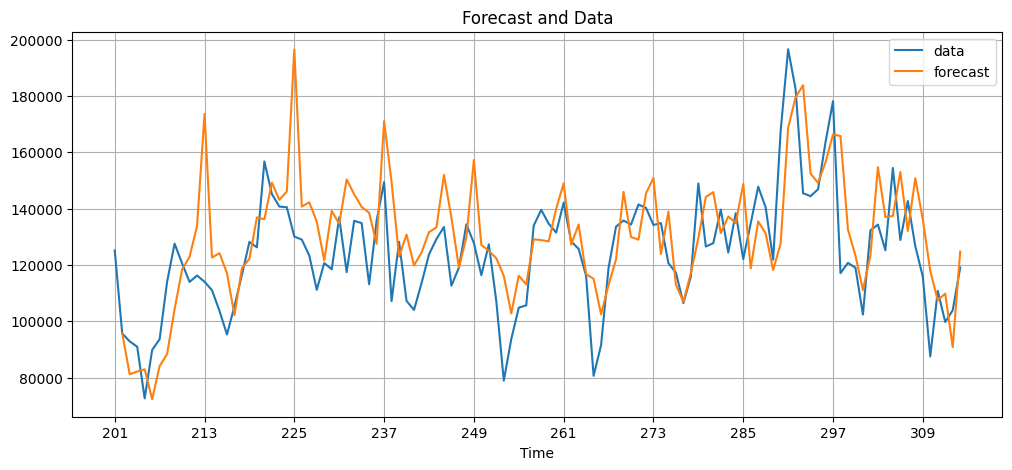

Error Summary
-------------
MAE: 14034.1008
MAPE: 11.8143
MSE: 339902002.9156
RMSE: 18436.4314

AIC: 2328.2945


In [442]:
DS.plot_forecasts(SALES_DISHWASHER[200:], MONTHS_DISHWASHER[200:], BEST_SARIMA_MODEL_TEST_PREDICTIONS, time_step=12)

DS.print_error_summary(SALES_DISHWASHER[200:], BEST_SARIMA_MODEL_TEST_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(BEST_SARIMA_MODEL_TEST.aic))